In [1]:
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
diagnosis=pd.read_csv("diagnosis.csv")
diagnosis.head()

,diagnosisid,patientunitstayid,activeupondischarge,diagnosisoffset,diagnosisstring,icd9code,diagnosispriority
0,4252056,142674,True,21,cardiovascular|chest pain / ASHD|acute coronar...,NaN,Primary
1,3739076,142674,True,21,cardiovascular|chest pain / ASHD|coronary arte...,"414.00, I25.10",Other
2,4003826,142674,True,21,renal|disorder of kidney|acute renal failure,"584.9, N17.9",Other
3,3863618,142674,True,21,pulmonary|disorders of the airways|obstructive...,"780.57, G47.33",Other
4,4103388,142674,True,21,cardiovascular|arrhythmias|atrial fibrillation,"427.31, I48.0",Other


In [3]:
cases=diagnosis.loc[diagnosis['diagnosisstring'].str.contains("sepsis")]

In [4]:
control=diagnosis.loc[~diagnosis['diagnosisstring'].str.contains("sepsis")]

In [5]:
cases_pids=np.unique(cases['patientunitstayid'])

In [6]:
control_pids=np.unique(control['patientunitstayid'])

In [7]:
vitalp=pd.read_csv("vitalPeriodic.csv")
np.shape(vitalp)

(1037527, 19)

In [18]:
vital_cases=pd.Series([])
for i in cases_pids:
    vital_cases=vital_cases.append(vitalp.loc[vitalp['patientunitstayid']==i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [19]:
vital_control=pd.Series([])
for i in control_pids:
    vital_control=vital_control.append(vitalp.loc[vitalp['patientunitstayid']==i])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexes\api.py:107: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  result = result.union(other)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [13]:
#cases fillna
vital_cases['heartrate']=vital_cases.fillna(vital_cases['heartrate'].mean())
vital_cases['systemicsystolic']=vital_cases.fillna(vital_cases['systemicsystolic'].mean())
vital_cases['respiration']=vital_cases.fillna(vital_cases['respiration'].mean())
#control fillna
                                              
vital_control['heartrate']=vital_control.fillna(vital_control['heartrate'].mean())
vital_control['systemicsystolic']=vital_control.fillna(vital_control['systemicsystolic'].mean())
vital_control['respiration']=vital_control.fillna(vital_control['respiration'].mean())                                              
                                              
'''                                              
vital_cases.sort_values(by=['observationoffset'],inplace=True)
vital_control.sort_values(by=['observationoffset'],inplace=True)'''
'''updated_vital_cases=pd.DataFrame()
for pid in vital_cases['patientunitstayid'].unique():
    c=vital_cases.loc[vital_cases['patientunitstayid']==pid]
    c['systemicsystolic']=c.fillna(c['systemicsystolic'].mean())
    updated_vital_cases=pd.concat([updated_vital_cases,c],axis=0,ignore_index=True)'''

"updated_vital_cases=pd.DataFrame()\nfor pid in vital_cases['patientunitstayid'].unique():\n    c=vital_cases.loc[vital_cases['patientunitstayid']==pid]\n    c['systemicsystolic']=c.fillna(c['systemicsystolic'].mean())\n    updated_vital_cases=pd.concat([updated_vital_cases,c],axis=0,ignore_index=True)"

In [20]:
vital_cases.describe()

,0,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
count,0.0,2.050410e+05,2.050410e+05,205041.000000,9980.000000,161553.000000,204359.000000,166051.000000,23913.000000,5861.000000,36651.000000,36655.000000,36866.000000,4709.000000,4709.000000,4710.000000,51561.000000,67556.000000,51641.000000,0.0
mean,NaN,2.459632e+08,5.196928e+05,11751.161607,37.112477,96.476395,91.684007,21.180493,25.614017,31.984303,121.043982,59.912454,80.845603,46.256105,22.531111,33.547983,-0.142879,-0.300342,-0.184932,NaN
std,NaN,2.178889e+08,3.636723e+05,21952.892925,1.168809,3.813687,18.452210,6.411540,59.414971,11.953612,28.305936,19.855785,26.186255,8.647922,5.993105,7.499623,0.736949,0.961662,0.923527,NaN
min,NaN,1.059515e+06,1.459170e+05,-1713.000000,18.800000,0.000000,0.000000,0.000000,-21.000000,0.000000,-49.000000,-50.000000,-49.000000,24.000000,5.000000,0.000000,-10.160000,-9.680000,-10.000000,NaN
25%,NaN,6.879735e+07,2.528040e+05,1405.000000,36.600000,95.000000,78.000000,17.000000,6.000000,28.000000,101.000000,50.000000,67.000000,40.000000,18.000000,28.000000,-0.280000,-0.640000,-0.480000,NaN
50%,NaN,1.082807e+08,3.049890e+05,3576.000000,37.000000,97.000000,92.000000,21.000000,10.000000,31.000000,117.000000,58.000000,78.000000,48.000000,23.000000,35.000000,-0.080000,-0.100000,-0.100000,NaN
75%,NaN,5.043766e+08,9.780110e+05,9036.000000,37.800000,99.000000,104.000000,25.000000,17.000000,37.000000,138.000000,66.000000,89.000000,53.000000,27.000000,39.000000,0.100000,0.100000,0.100000,NaN
max,NaN,6.311962e+08,1.115917e+06,119267.000000,41.400000,100.000000,240.000000,194.000000,336.000000,99.000000,337.000000,328.000000,361.000000,69.000000,65.000000,165.000000,10.160000,10.000000,10.160000,NaN


In [21]:
vital_control.describe()

,0,vitalperiodicid,patientunitstayid,observationoffset,temperature,sao2,heartrate,respiration,cvp,etco2,systemicsystolic,systemicdiastolic,systemicmean,pasystolic,padiastolic,pamean,st1,st2,st3,icp
count,0.0,9.632920e+05,9.632920e+05,963292.000000,36598.000000,829040.000000,959576.000000,848690.000000,108200.000000,78851.000000,185691.000000,185694.000000,186782.00000,32740.000000,32732.000000,33370.000000,380858.000000,417023.000000,379933.000000,8415.000000
mean,NaN,3.726472e+08,7.301177e+05,6909.463347,37.128601,96.366396,86.836932,20.358361,30.210102,33.420350,125.766952,61.397945,82.93675,37.314356,18.458573,28.352322,-0.053922,-0.060606,-0.040077,6.889721
std,NaN,2.242879e+08,3.763484e+05,12545.534046,1.056458,3.695304,19.052174,6.993940,64.359573,10.771514,26.542563,17.329123,21.74456,11.315923,7.602561,22.419215,0.739771,0.854553,0.781269,7.154478
min,NaN,1.059515e+06,1.426740e+05,-3272.000000,13.800000,0.000000,0.000000,0.000000,-51.000000,0.000000,-63.000000,-63.000000,-63.00000,-60.000000,-61.000000,-60.000000,-10.160000,-9.760000,-12.800000,-33.000000
25%,NaN,1.072909e+08,2.960610e+05,1151.000000,36.778000,95.000000,73.000000,16.000000,7.000000,27.000000,108.000000,52.000000,71.00000,30.000000,14.000000,20.000000,-0.240000,-0.400000,-0.300000,3.000000
50%,NaN,5.067665e+08,9.720390e+05,2868.000000,37.200000,97.000000,86.000000,20.000000,12.000000,32.000000,123.000000,60.000000,80.00000,35.000000,18.000000,25.000000,0.000000,0.000000,0.000000,7.000000
75%,NaN,5.725639e+08,1.061601e+06,6968.000000,37.700000,99.000000,100.000000,24.000000,18.000000,39.000000,142.000000,69.000000,92.00000,45.000000,23.000000,32.000000,0.150000,0.300000,0.240000,10.000000
max,NaN,6.314532e+08,1.135186e+06,119267.000000,41.400000,100.000000,279.000000,194.000000,361.000000,99.000000,368.000000,363.000000,364.00000,291.000000,325.000000,339.000000,12.300000,12.100000,11.700000,106.000000


In [19]:
cases_toplot=vital_cases.iloc[:500,:]

In [20]:
cases_toplot.drop(columns=[0],axis=1,inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


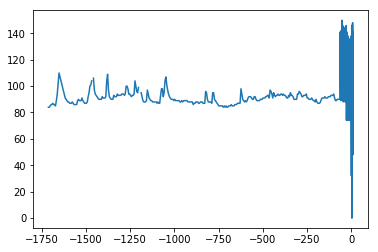

In [22]:
plt.plot(cases_toplot['observationoffset'].values,cases_toplot['heartrate'].values)
plt.show()

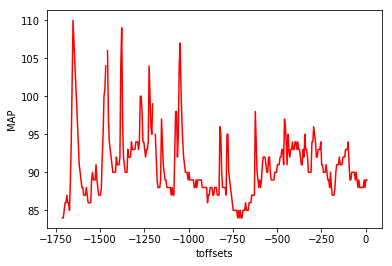

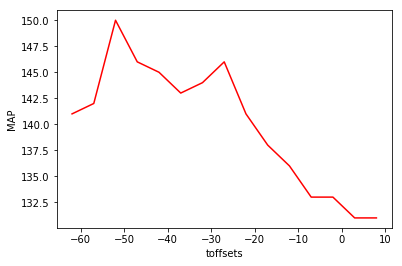

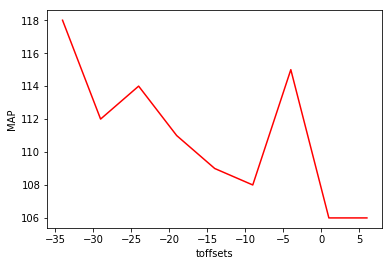

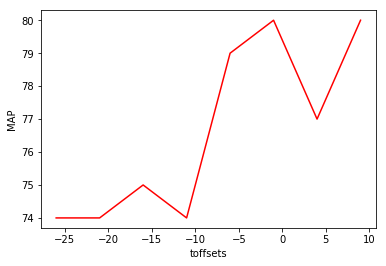

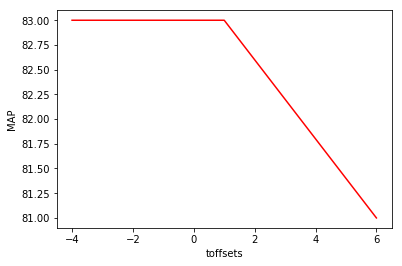

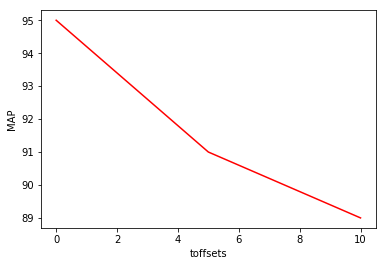

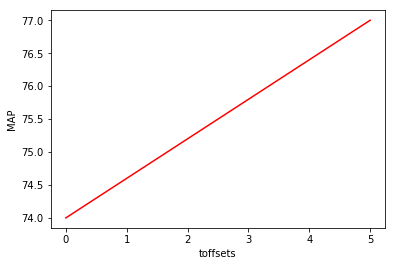

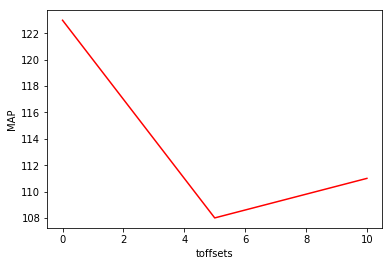

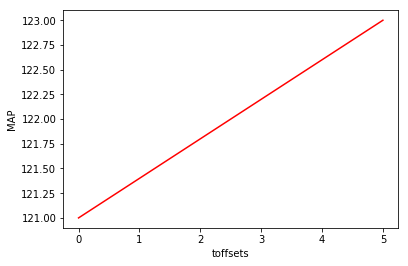

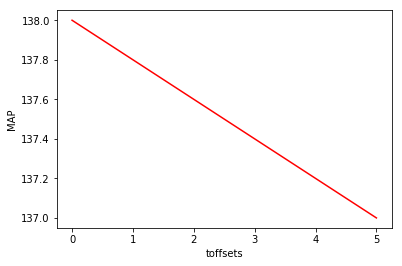

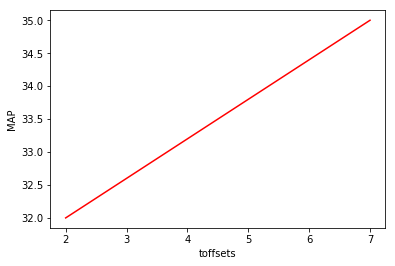

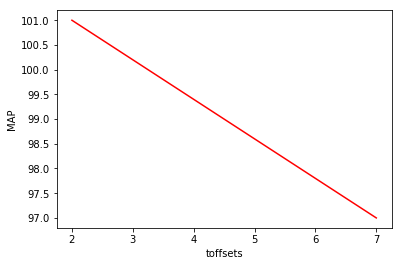

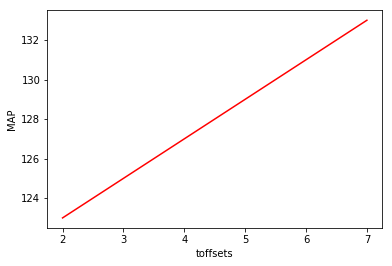

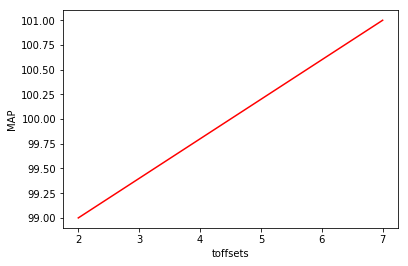

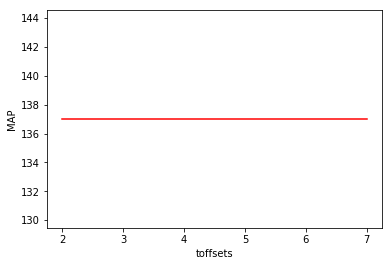

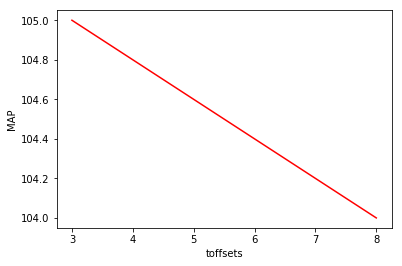

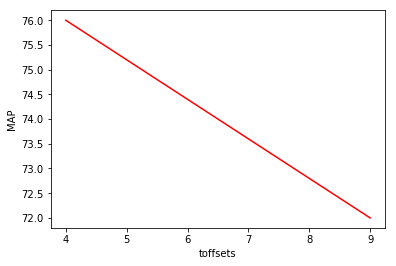

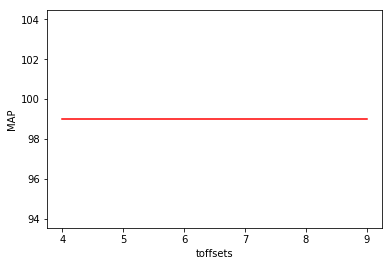

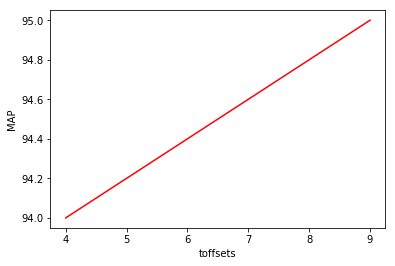

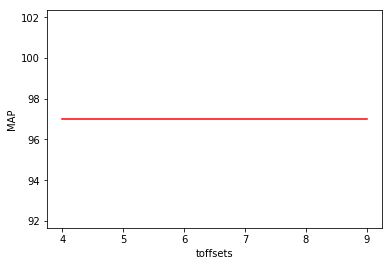

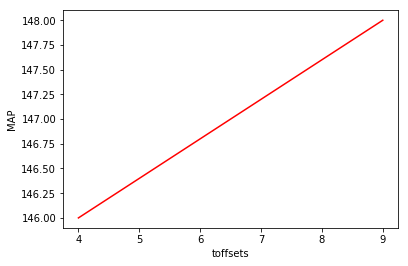

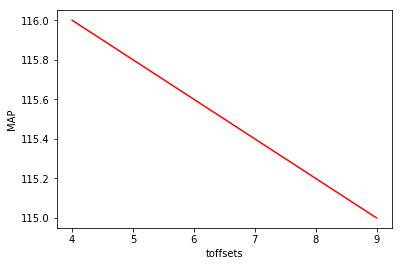

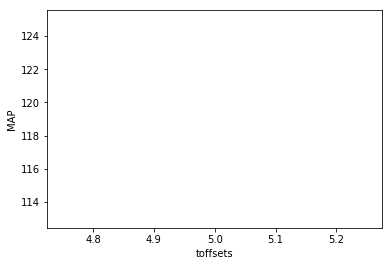

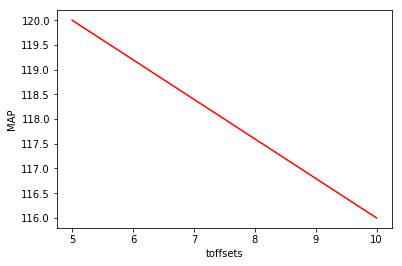

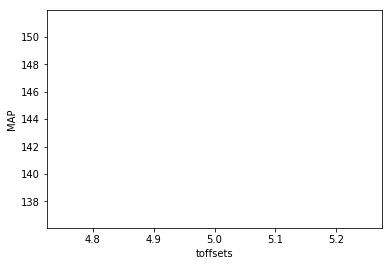

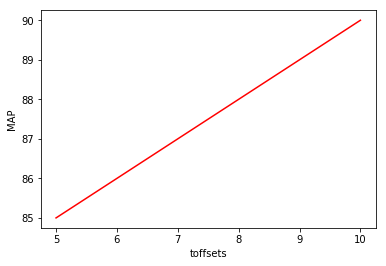

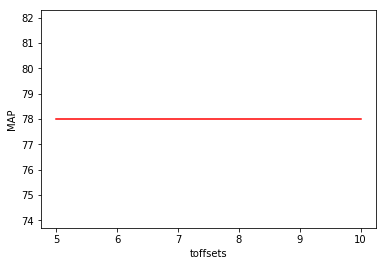

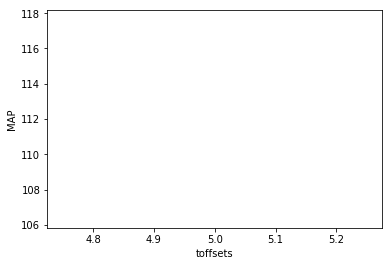

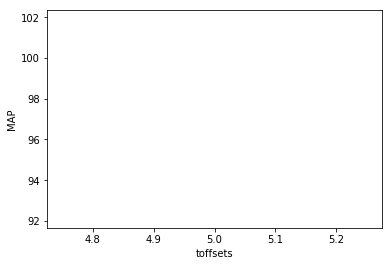

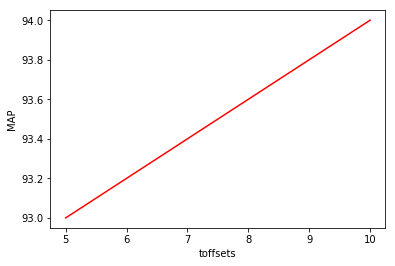

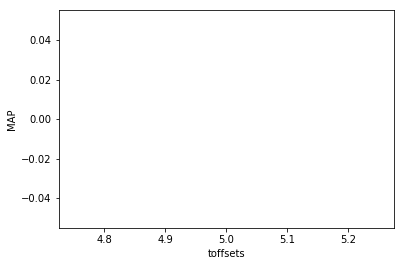

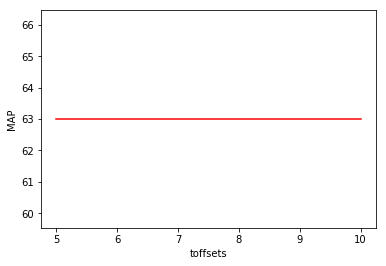

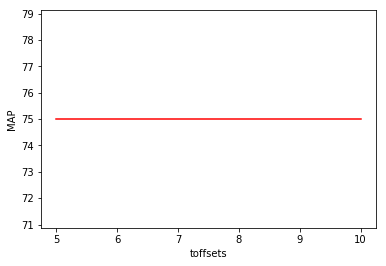

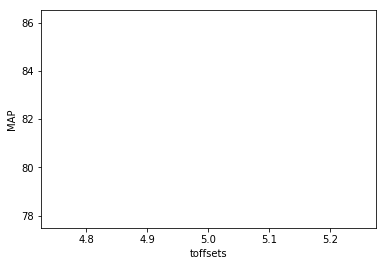

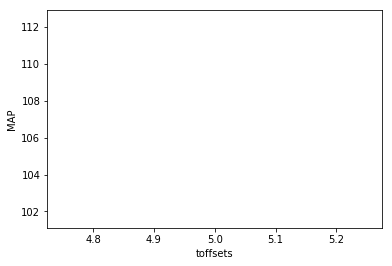

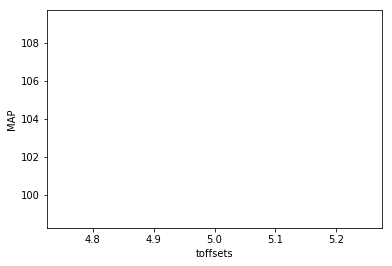

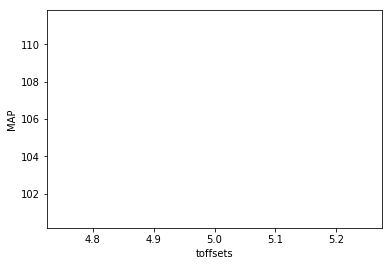

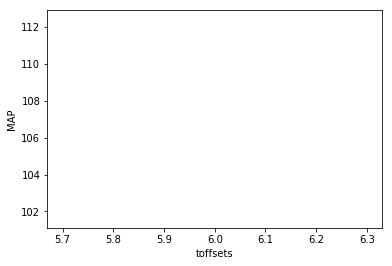

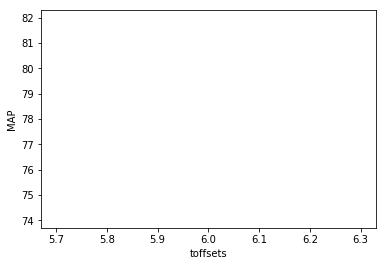

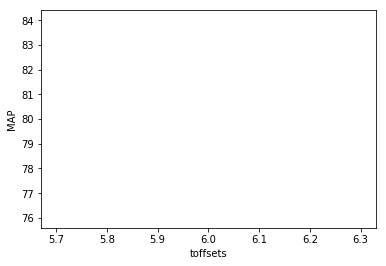

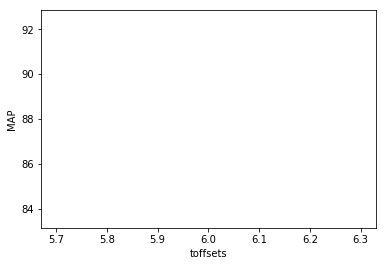

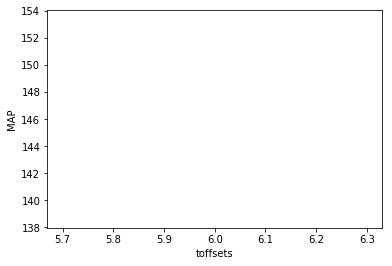

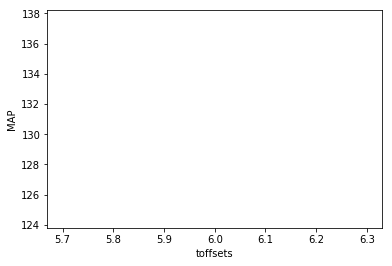

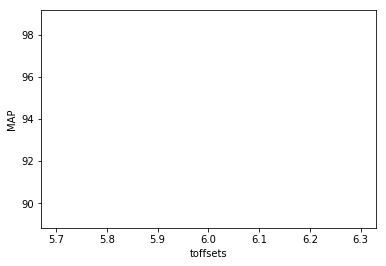

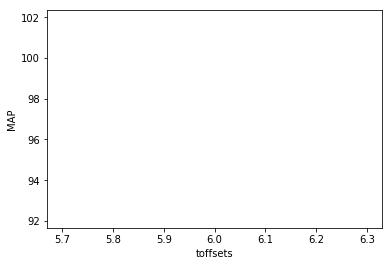

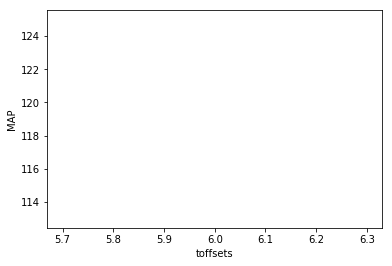

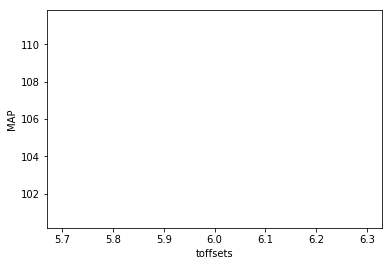

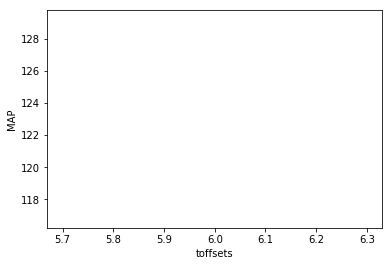

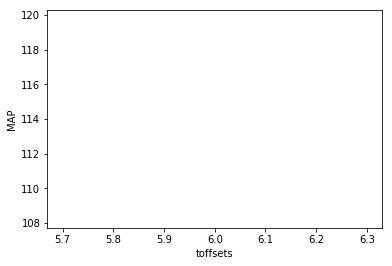

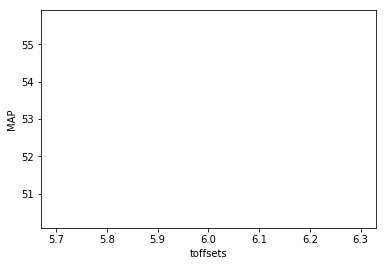

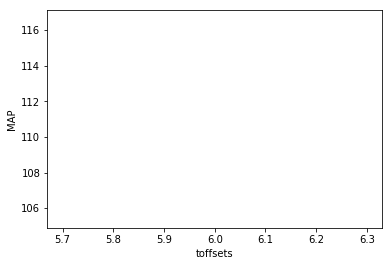

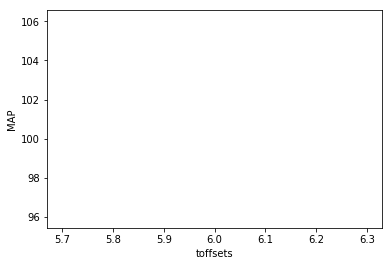

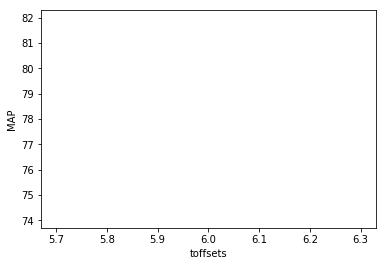

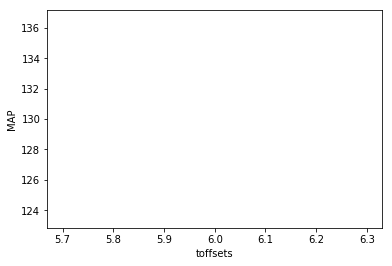

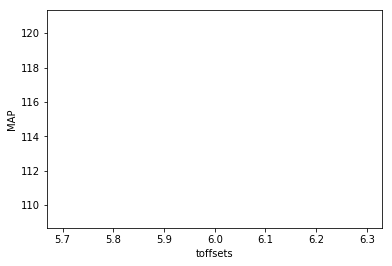

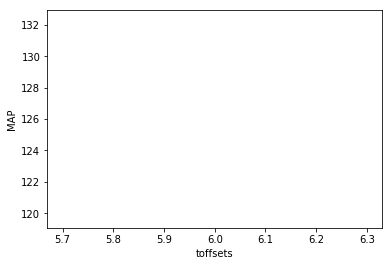

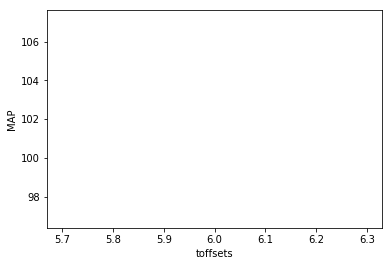

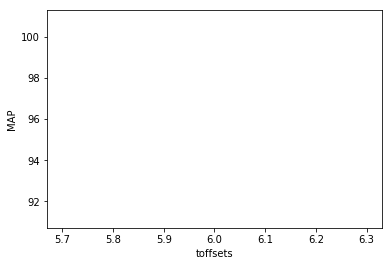

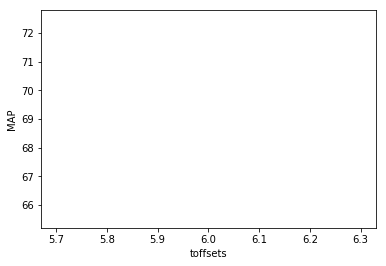

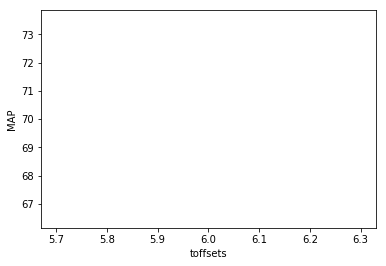

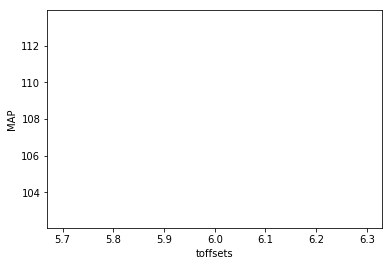

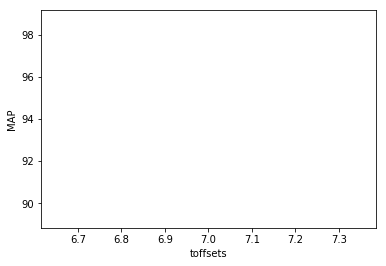

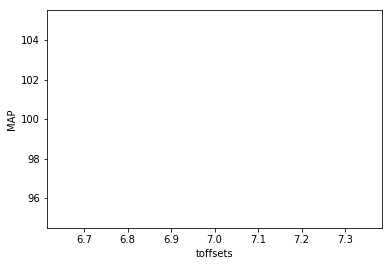

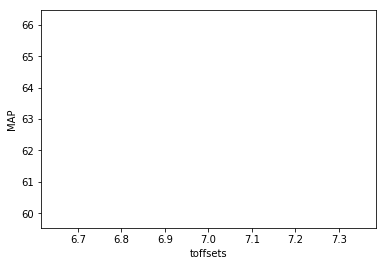

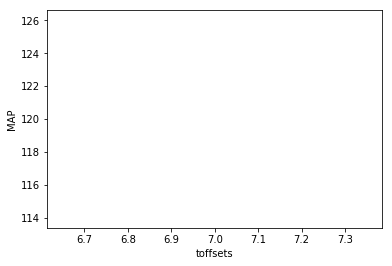

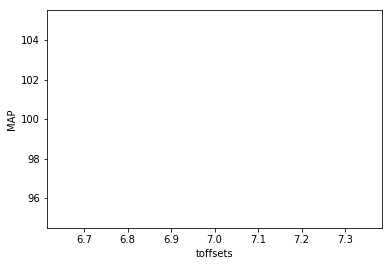

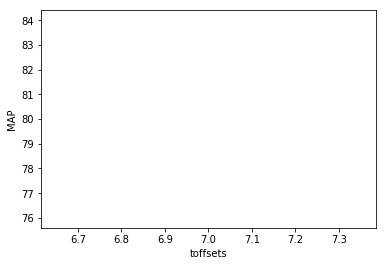

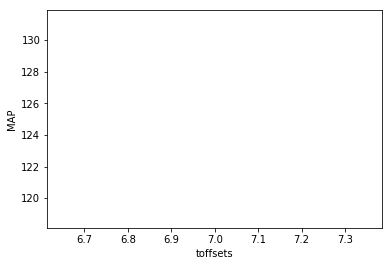

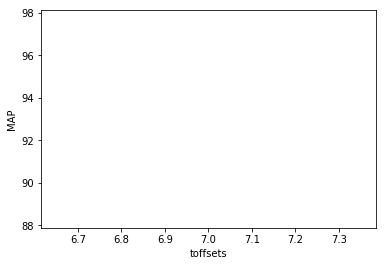

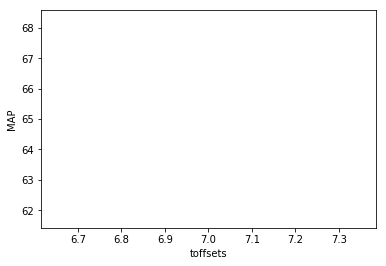

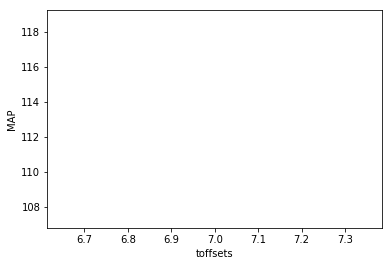

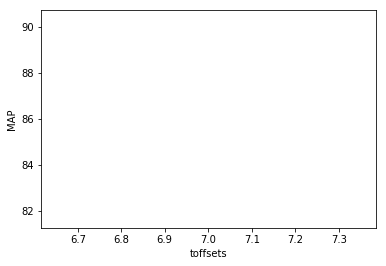

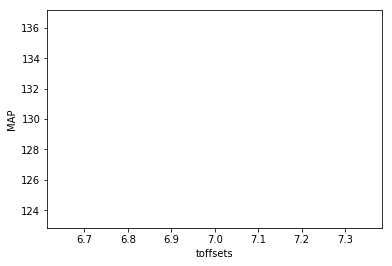

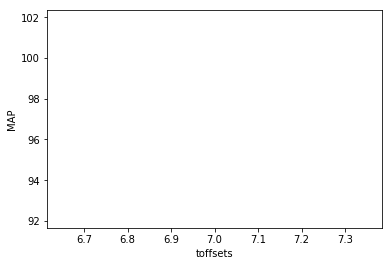

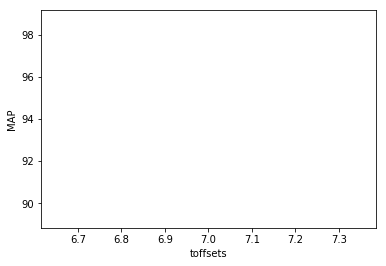

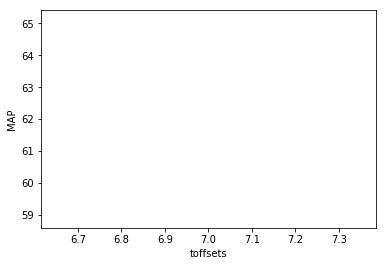

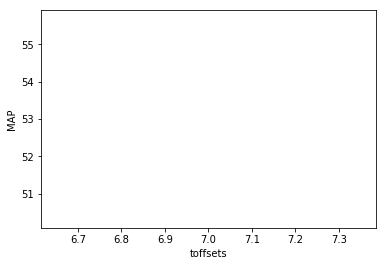

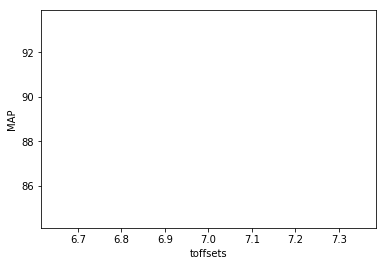

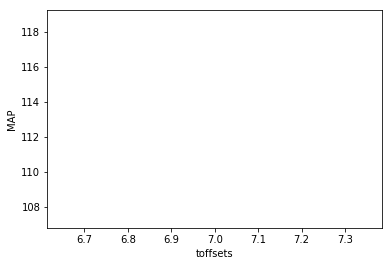

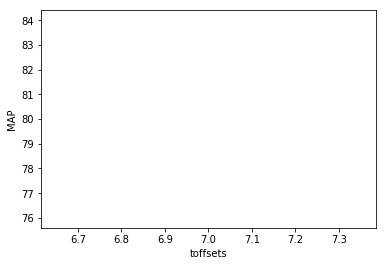

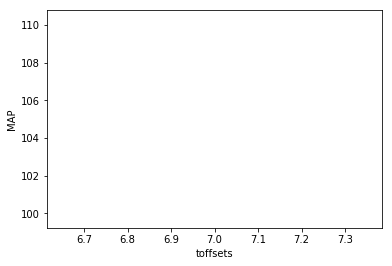

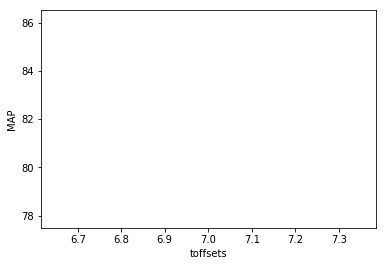

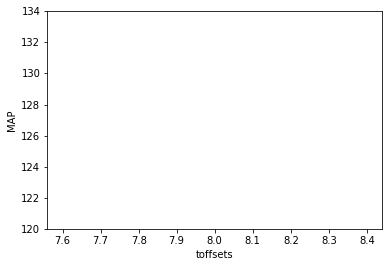

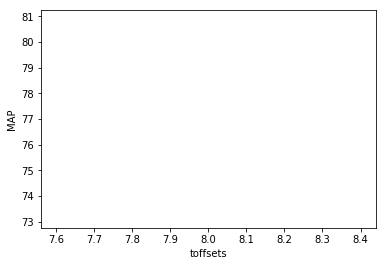

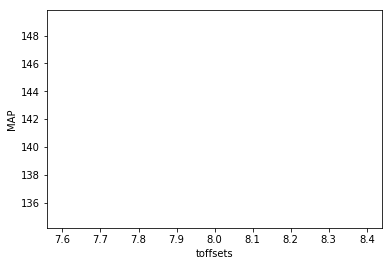

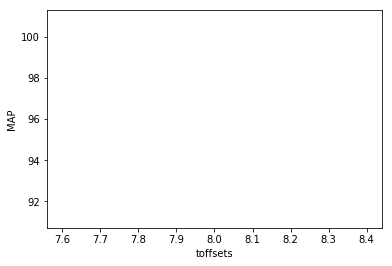

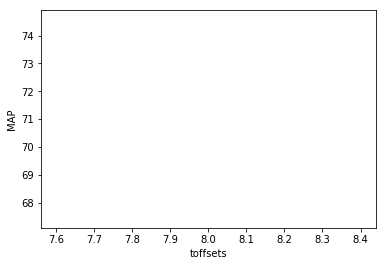

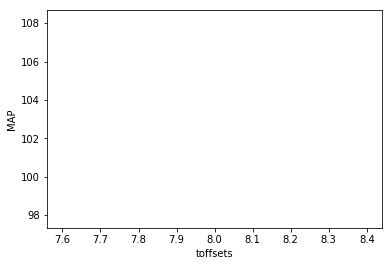

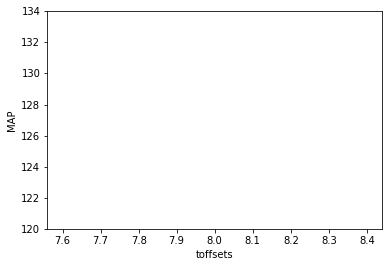

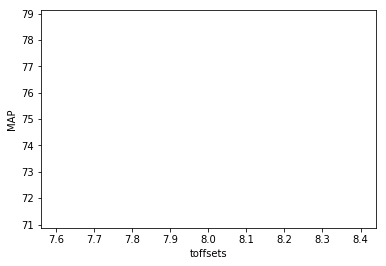

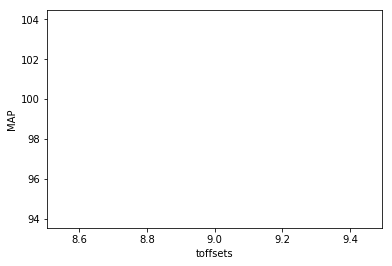

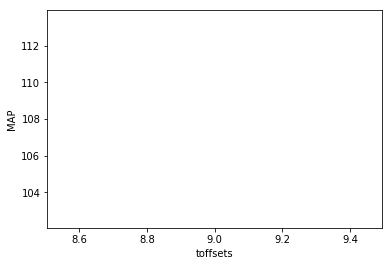

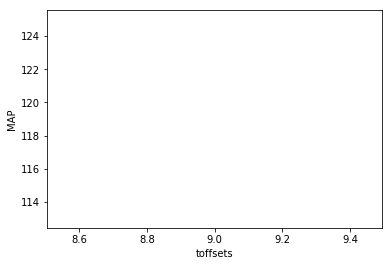

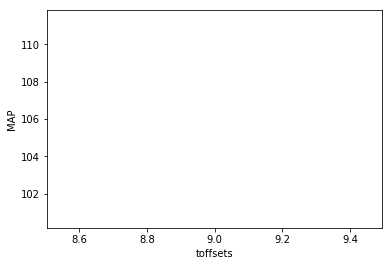

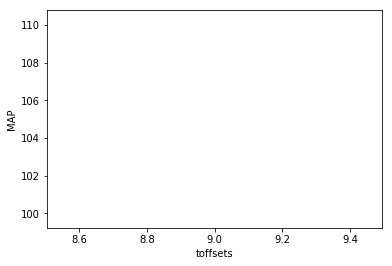

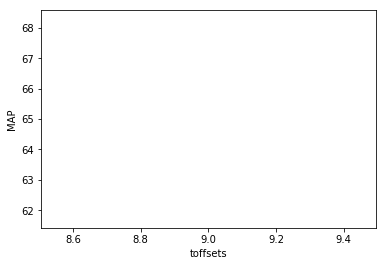

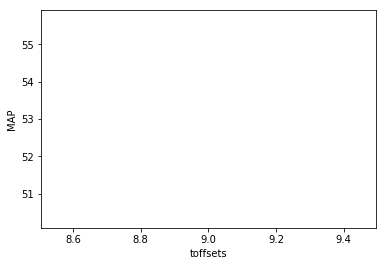

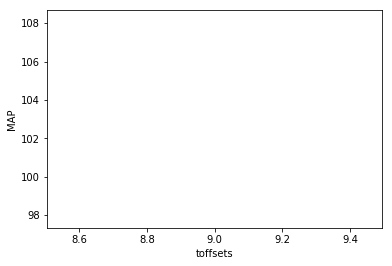

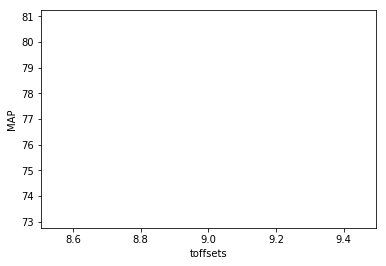

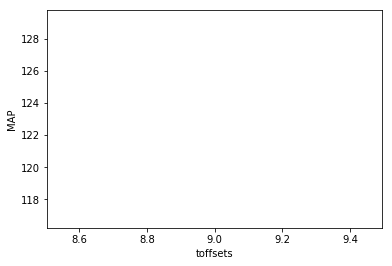

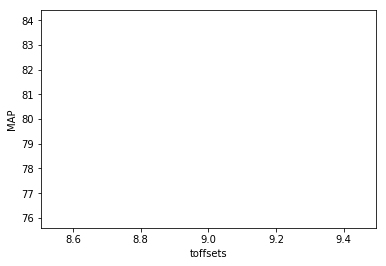

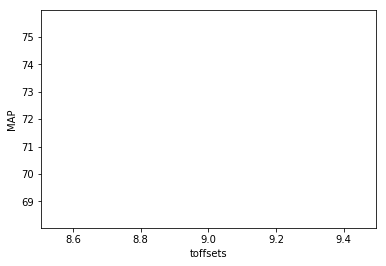

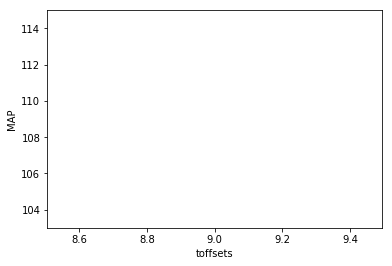

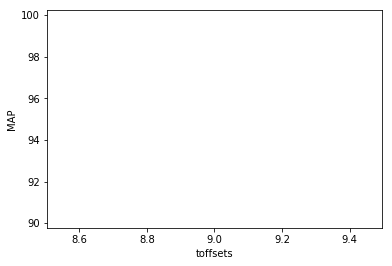

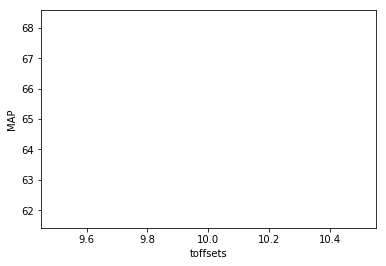

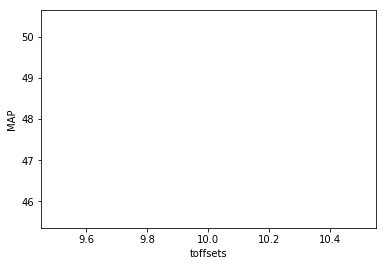

In [21]:
for pid in cases_toplot['patientunitstayid'].unique():
    uniqueid=cases_toplot.loc[cases_toplot['patientunitstayid']==pid]
    MAP=uniqueid['systemicsystolic'].values
    heartrate=uniqueid['heartrate'].values
    resprates=uniqueid['respiration'].values
    timestamps=uniqueid['observationoffset'].values
    
    plt.plot(timestamps,heartrate,color='red')
    #plt.plot(timestamps,resprates,color='blue')
    plt.xlabel("toffsets")
    plt.ylabel("MAP")
    plt.show()

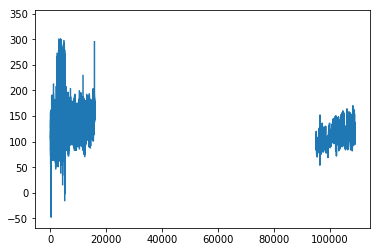

In [20]:
plt.plot(vital_cases['observationoffset'].values,vital_cases['systemicsystolic'].values)
plt.show()